# Create and train network

create and train network

In [75]:
import csv

dim = 11
size = pow(2, dim)

data_file = open(f'data{dim}.csv', mode='r')
dreader = csv.reader(data_file, delimiter=',')

target_file = open(f'target{dim}.csv', mode='r')
treader = csv.reader(target_file, delimiter=',')

In [76]:
data = []
target = []
for row in dreader:
    y = []
    for x in row:
        y.append(float(x)*0.99+0.01)
    data.append(y)
    
for row in treader:
    y = []
    for x in row:
        y.append(float(x)*0.99+0.01)
    target.append(y)
    
print(len(data))
print(len(target))
print(data[123])
print(target[123])

2048
2048
[1.0, 1.0, 0.01, 1.0, 1.0, 1.0, 1.0, 0.01, 0.01, 0.01, 0.01]
[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 1.0, 0.01, 0.01, 0.01, 0.01, 0.01]


In [99]:
import time
import random
from neural.neuralNetwork import neuralNetwork


random.seed(144)
input_nodes = dim
hidden_nodes = dim * 4
output_nodes = dim + 1
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
nn = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# start traing sessions
sessions = 200
nst = 1024 #pow(2, dim - 1) #int(size / 2) 
print(nst)

x = []
y_avg = []
y_err = []
y_dev = []

ind = list(range(size))
# shuffle indexes
random.shuffle(ind)
# indx for training
tind = ind[:nst]
# index for check
cind = ind[nst:size]

t_start = time.time()
for js in range(sessions):
    random.shuffle(tind)
    for i in tind:
        nn.train(data[i], target[i])
    if True:
        ss = 0.0
        ss2 = 0.0
        max = 0.0
        nerr = 0
        for i in cind:
            res = nn.query(data[i])
            s = 0.0
            for j in range(2, dim -2):
                s += pow(res[j, 0]-target[i][j], 2)
           # y = []
          #  z = []
            vmax = 0
            for j in range(dim + 1):
                #y.append(format(res[j, 0], '.1f'))
                if res[j, 0] > vmax :
                    vmax = res[j, 0]
                    jmax = j
            if target[i][jmax] < 0.99 :
                if jmax in range(2, dim - 1): # error!
                    nerr += 1
                
           # for k in target[i]:
            #  z.append(format(k, '.1f'))
            # big error    
            #if s > 1.95:
            #    print(data[i], y)
            ss += s
            ss2 += s*s
            if s > max:
                max = s
        avg = ss / nst
        var = ss2 / nst
        dev = pow(var - avg*avg, 0.5)
        err = nerr / (size - nst)
        print("% errors:", format(err * 100, '.2f'))
        #print('avg=', format(avg, '0.3f'), " dev=", format(dev, '0.3f'), " max err=", format(max, '0.3f'))
        x.append(js)
        y_avg.append(avg)
        y_err.append(err)
        y_dev.append(dev)
t = time.time() - t_start
print ("Training done, it took ", t, " secs")

1024
% errors: 74.61
% errors: 62.40
% errors: 66.60
% errors: 71.97
% errors: 74.02
% errors: 70.02
% errors: 68.46
% errors: 66.21
% errors: 58.01
% errors: 75.00
% errors: 57.13
% errors: 66.50
% errors: 55.18
% errors: 72.95
% errors: 63.57
% errors: 71.39
% errors: 53.12
% errors: 39.65
% errors: 57.42
% errors: 33.59
% errors: 32.91
% errors: 46.09
% errors: 44.24
% errors: 38.38
% errors: 34.28
% errors: 20.12
% errors: 38.87
% errors: 33.50
% errors: 19.53
% errors: 22.27
% errors: 21.29
% errors: 22.46
% errors: 25.39
% errors: 14.84
% errors: 11.13
% errors: 14.16
% errors: 18.55
% errors: 14.16
% errors: 17.97
% errors: 11.52
% errors: 7.71
% errors: 11.72
% errors: 9.08
% errors: 12.60
% errors: 8.20
% errors: 11.43
% errors: 9.47
% errors: 8.30
% errors: 8.59
% errors: 8.69
% errors: 9.08
% errors: 8.40
% errors: 9.86
% errors: 8.01
% errors: 8.98
% errors: 6.64
% errors: 8.20
% errors: 7.23
% errors: 7.91
% errors: 7.62
% errors: 8.40
% errors: 7.52
% errors: 5.57
% error

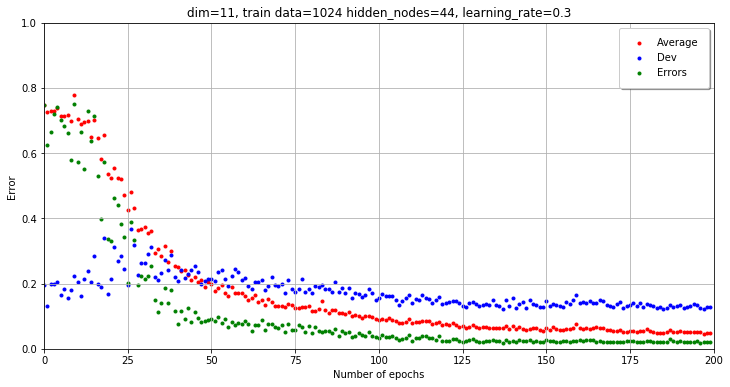

In [101]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
ax = plt.axes()
plt.scatter(x, y_avg, marker='.', color='red', label='Average')
plt.scatter(x, y_dev, marker='.', color='blue', label='Dev')
plt.scatter(x, y_err, marker='.', color='green', label='Errors')
plt.xlim(0, sessions)
plt.ylim(0, 1)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title(f'dim={dim}, train data={nst} hidden_nodes={hidden_nodes}, learning_rate={learning_rate}')
ax.grid(b=True, which='both')

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);
